In [1]:
from keras.datasets import mnist

import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [3]:
ls

Untitled.ipynb
derby.log
generate-train-test-sample-from-hr4-L150-catalog-N400.ipynb
generate-train-test-sample-from-hr4-catalog-N200.ipynb
generate-train-test-sample-from-hr4-catalog-N800.ipynb
generate-train-test-sample-from-hr4-catalog-pyspark-wip.ipynb
generate-train-test-sample-from-hr4-catalog-pyspark.ipynb
generate-train-test-sample-from-hr4-catalog.ipynb
graph_big_step1_divide_to_30x30x30_pieces-v4-equal-abundance.ipynb
graph_big_step1_divide_to_31x31x31_pieces-v4-equal-abundance.ipynb
graph_big_step1_divide_to_L150_pieces-v4-equal-abundance.ipynb
hr150data.parquet.snappy
hrdata.parquet.snappy
keras-train-hr-L150-N400.ipynb
keras-train-hr-N200.ipynb
keras-train-hr-N800.ipynb
keras-train-hr.ipynb
log.log
metastore_db/
random-sample-generator-edge-projection.ipynb
read-trim-big-csv-to-dataframe-then-save-to-parquet.ipynb
result_sample.pdf
result_sample.png
sample.png
sample400.png
sample800.png
testRand200.pickle
testRand400.pickle
testRand400L150.pickle
testRand800.pickle
trainR

In [4]:
# Load the original images 
import pickle

with open('trainRand400.pickle','rb') as f:
    X_train, y_train_tmp = pickle.load(f)
f.close() #keep dumping the current results to overwrite the pickle. 

with open('testRand400.pickle','rb') as f:
    X_test, y_test_tmp = pickle.load(f)
f.close() #keep dumping the current results to overwrite the pickle. 



In [5]:
X_train.shape

(40000, 1200)

In [6]:
y_train_tmp.shape

(40000,)

## Multilayer Perceptrons 

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

In [8]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train_tmp)
y_test = np_utils.to_categorical(y_test_tmp)
num_classes = y_test.shape[1]

In [9]:
y_train.shape

(40000, 2)

In [10]:
y_test.shape

(14000, 2)

In [11]:
y_train[:5]

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.]], dtype=float32)

### Visualize the samples

In [12]:
numhalo=400

In [13]:
ix = np.arange(numhalo)*3
iy = np.arange(numhalo)*3 + 1
iz = np.arange(numhalo)*3 + 2

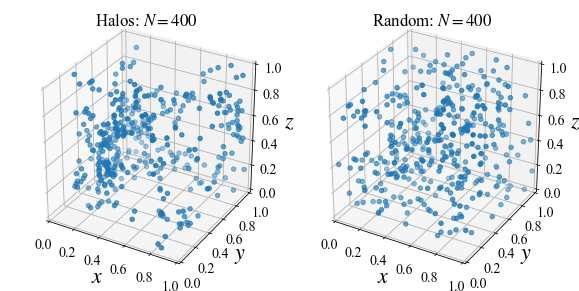

In [14]:
from mpl_toolkits.mplot3d import Axes3D

# plot settings
plt.rc('font', family='serif') 
plt.rc('font', serif='Times New Roman') 
plt.rcParams.update({'font.size': 14})
plt.rcParams['mathtext.fontset'] = 'stix'

fig = plt.figure(figsize=(8,4))

ax = fig.add_subplot(121, projection='3d')
ax.set_title(r'Halos: $N = 400$')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 1)

ax.scatter(X_train[0,ix],X_train[0,iy],X_train[0,iz])
ax.set_xlabel(r'$x$',fontsize=22)
ax.set_ylabel(r'$y$',fontsize=22)
ax.set_zlabel(r'$z$',fontsize=22)

ax = fig.add_subplot(122, projection='3d')
ax.set_title(r'Random: $N = 400$')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 1)

ax.scatter(X_train[2,ix],X_train[2,iy],X_train[2,iz])
ax.set_xlabel(r'$x$',fontsize=22)
ax.set_ylabel(r'$y$',fontsize=22)
ax.set_zlabel(r'$z$',fontsize=22)




plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.savefig('sample.png')

plt.show()

In [15]:
num_pixels = 1200
num_neurons = 400
# define baseline model
def new_baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(num_neurons, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [16]:
%%time
# build the model
model = new_baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=40, batch_size=400, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 40000 samples, validate on 14000 samples
Epoch 1/40
 - 2s - loss: 0.7586 - acc: 0.4997 - val_loss: 0.6958 - val_acc: 0.5075
Epoch 2/40
 - 1s - loss: 0.6951 - acc: 0.5108 - val_loss: 0.6948 - val_acc: 0.5038
Epoch 3/40
 - 1s - loss: 0.6916 - acc: 0.5276 - val_loss: 0.6944 - val_acc: 0.5171
Epoch 4/40
 - 1s - loss: 0.6867 - acc: 0.5489 - val_loss: 0.6853 - val_acc: 0.5519
Epoch 5/40
 - 1s - loss: 0.6689 - acc: 0.5992 - val_loss: 0.6624 - val_acc: 0.5591
Epoch 6/40
 - 1s - loss: 0.6094 - acc: 0.6917 - val_loss: 0.5820 - val_acc: 0.7136
Epoch 7/40
 - 1s - loss: 0.5297 - acc: 0.7567 - val_loss: 0.5220 - val_acc: 0.7437
Epoch 8/40
 - 1s - loss: 0.4654 - acc: 0.7930 - val_loss: 0.4623 - val_acc: 0.7931
Epoch 9/40
 - 1s - loss: 0.4160 - acc: 0.8184 - val_loss: 0.4282 - val_acc: 0.8079
Epoch 10/40
 - 1s - loss: 0.3842 - acc: 0.8317 - val_loss: 0.4014 - val_acc: 0.8201
Epoch 11/40
 - 1s - loss: 0.3582 - acc: 0.8441 - val_loss: 0.3845 - val_acc: 0.8293
Epoch 12/40
 - 1s - loss: 0.3344 - 

In [17]:
retest = model.predict(X_test)
print retest[:10]

[[5.3771389e-01 4.6228614e-01]
 [6.6117036e-01 3.3882970e-01]
 [9.9989939e-01 1.0054530e-04]
 [2.8858054e-01 7.1141946e-01]
 [9.9819928e-01 1.8006911e-03]
 [5.2311081e-01 4.7688922e-01]
 [9.9999976e-01 2.1187047e-07]
 [1.0412322e-01 8.9587682e-01]
 [6.8327505e-03 9.9316722e-01]
 [2.1332357e-02 9.7866768e-01]]


In [18]:
retest_classes = model.predict_classes(X_test)
print retest_classes[:20]

[0 0 0 1 0 0 0 1 1 1 0 0 1 1 1 1 0 0 1 0]


In [19]:
print y_test_tmp[0:20]

[1 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1 0 0 1 0]


In [20]:
retest[:30]

array([[5.3771389e-01, 4.6228614e-01],
       [6.6117036e-01, 3.3882970e-01],
       [9.9989939e-01, 1.0054530e-04],
       [2.8858054e-01, 7.1141946e-01],
       [9.9819928e-01, 1.8006911e-03],
       [5.2311081e-01, 4.7688922e-01],
       [9.9999976e-01, 2.1187047e-07],
       [1.0412322e-01, 8.9587682e-01],
       [6.8327505e-03, 9.9316722e-01],
       [2.1332357e-02, 9.7866768e-01],
       [9.9995530e-01, 4.4670167e-05],
       [9.9999702e-01, 3.0331846e-06],
       [3.9047454e-03, 9.9609524e-01],
       [1.1421156e-01, 8.8578844e-01],
       [1.0436139e-02, 9.8956388e-01],
       [3.1523157e-02, 9.6847677e-01],
       [8.6116332e-01, 1.3883668e-01],
       [1.0000000e+00, 2.5000637e-09],
       [1.4612304e-02, 9.8538762e-01],
       [9.6465635e-01, 3.5343688e-02],
       [7.2721064e-01, 2.7278939e-01],
       [9.9086505e-01, 9.1349641e-03],
       [1.0000000e+00, 3.5225646e-08],
       [8.8922292e-01, 1.1077708e-01],
       [1.0000000e+00, 5.5143572e-12],
       [1.5629476e-03, 9.

### Confusion Matrix

In [21]:
from sklearn.metrics import confusion_matrix

In [22]:
len(y_test_tmp)

14000

In [23]:
len(retest_classes)

14000

In [24]:
confusion_matrix(y_test_tmp,retest_classes)

array([[6180,  820],
       [ 695, 6305]])

#### Using `Pandas crosstab`

In [25]:
y_actu = pd.Series(y_test_tmp, name='Actual')
y_pred = pd.Series(retest_classes, name='Predicted')

In [26]:
df_confusion = pd.crosstab(y_actu, y_pred)

In [27]:
df_confusion

Predicted,0,1
Actual,,
0,6180,820
1,695,6305


In [28]:
df_conf_norm = df_confusion / df_confusion.sum(axis=1)

In [29]:
df_conf_norm

Predicted,0,1
Actual,,
0,0.882857,0.117143
1,0.099286,0.900714


In [30]:
df_conf_norm.columns = ['Cosmic','Random']

In [31]:
df_conf_norm.index = ['Cosmic','Random']

### Plot some samples and their predictions

In [32]:
retest[4]

array([0.9981993 , 0.00180069], dtype=float32)

In [33]:
np.array2string(retest[4], formatter={'float_kind':lambda x: "%.3f;" % x})

'[0.998; 0.002;]'

In [35]:
import seaborn as sn

In [36]:
# plot settings
plt.rc('font', family='serif') 
plt.rc('font', serif='Times New Roman') 
plt.rcParams.update({'font.size': 14})
plt.rcParams['mathtext.fontset'] = 'stix'



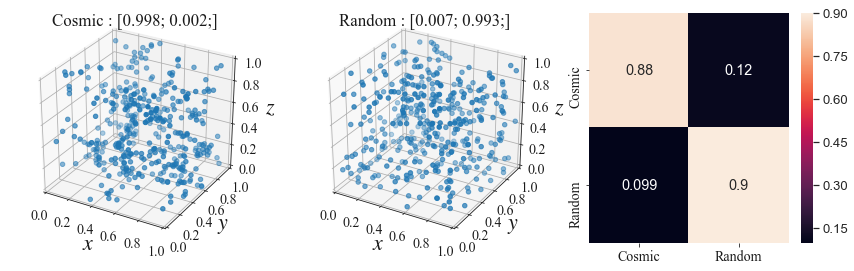

In [37]:

fig = plt.figure(figsize=(12.2,4))

ax = fig.add_subplot(131, projection='3d')
ax.set_title('Cosmic : '+np.array2string(retest[4], formatter={'float_kind':lambda x: "%.3f;" % x}))
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 1)

ax.scatter(X_test[4,ix],X_test[4,iy],X_test[4,iz])
ax.set_xlabel(r'$x$',fontsize=22)
ax.set_ylabel(r'$y$',fontsize=22)
ax.set_zlabel(r'$z$',fontsize=22)

ax = fig.add_subplot(132, projection='3d')
ax.set_title('Random : '+np.array2string(retest[8], formatter={'float_kind':lambda x: "%.3f;" % x}))
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 1)

ax.scatter(X_test[0,ix],X_test[0,iy],X_test[0,iz])
ax.set_xlabel(r'$x$',fontsize=22)
ax.set_ylabel(r'$y$',fontsize=22)
ax.set_zlabel(r'$z$',fontsize=22)

plt.subplot(133)
sn.set(font_scale=1.2)
sn.heatmap(df_conf_norm, annot=True)



#plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.tight_layout()
plt.savefig('result_sample.png')
plt.savefig('result_sample.pdf')

plt.show()

### Try a new one

> Add one more layer

In [40]:
num_pixels = 1200
num_neurons = 400
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(num_neurons, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(200, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [41]:
%%time
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=300, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 40000 samples, validate on 14000 samples
Epoch 1/30
 - 2s - loss: 0.7082 - acc: 0.5010 - val_loss: 0.6936 - val_acc: 0.5011
Epoch 2/30
 - 2s - loss: 0.6928 - acc: 0.5104 - val_loss: 0.6920 - val_acc: 0.5160
Epoch 3/30
 - 2s - loss: 0.6699 - acc: 0.5775 - val_loss: 0.6166 - val_acc: 0.6539
Epoch 4/30
 - 2s - loss: 0.5463 - acc: 0.7111 - val_loss: 0.5852 - val_acc: 0.6729
Epoch 5/30
 - 2s - loss: 0.5196 - acc: 0.7311 - val_loss: 0.5083 - val_acc: 0.7384
Epoch 6/30
 - 2s - loss: 0.4610 - acc: 0.7794 - val_loss: 0.4399 - val_acc: 0.7946
Epoch 7/30
 - 2s - loss: 0.3826 - acc: 0.8300 - val_loss: 0.3858 - val_acc: 0.8284
Epoch 8/30
 - 2s - loss: 0.3608 - acc: 0.8415 - val_loss: 0.3953 - val_acc: 0.8225
Epoch 9/30
 - 2s - loss: 0.3536 - acc: 0.8457 - val_loss: 0.3978 - val_acc: 0.8184
Epoch 10/30
 - 2s - loss: 0.3446 - acc: 0.8496 - val_loss: 0.3718 - val_acc: 0.8335
Epoch 11/30
 - 2s - loss: 0.3304 - acc: 0.8582 - val_loss: 0.4083 - val_acc: 0.8194
Epoch 12/30
 - 2s - loss: 0.3226 - 